# URL Text data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

## Load Data & Overview

In [3]:
df = pd.read_parquet('../02_data/url.text.parquet')

df.head()

,url,mean_views,mean_fwds,top_1_fwds,top_1_fwds_id,top_1_fwds_text,top_2_fwds,top_2_fwds_id,top_2_fwds_text,top_3_fwds,...,top_3_fwds_text,top_1_views,top_1_views_id,top_1_views_text,top_2_views,top_2_views_id,top_2_views_text,top_3_views,top_3_views_id,top_3_views_text
0,https://odysee.com/@jermwarfare:2/The-Baileys:8,17471.090909,79.545455,144,1038684915,My husband Mark and I had a very uplifting con...,143,823906160,My husband Mark and I had a very uplifting con...,143,...,My husband Mark and I had a very uplifting con...,31707,1038684915,My husband Mark and I had a very uplifting con...,31692,823906160,My husband Mark and I had a very uplifting con...,31690,812659286,My husband Mark and I had a very uplifting con...
1,https://drsambailey.com/its-elementary-my-dear...,7672.222222,17.277778,43,1038700527,‘It’s Elementary My Dear Watson’ – Unmasking T...,43,1038700526,‘It’s Elementary My Dear Watson’ – Unmasking T...,43,...,‘It’s Elementary My Dear Watson’ – Unmasking T...,19737,1038700527,‘It’s Elementary My Dear Watson’ – Unmasking T...,19737,1038700526,‘It’s Elementary My Dear Watson’ – Unmasking T...,19722,812662898,‘It’s Elementary My Dear Watson’ – Unmasking T...
2,https://drsambailey.com/why-nobody-had-caught-...,9891.875000,132.394231,466,2187606152,"Why Nobody ""Had, Caught or Got"" COVID-19\n\nDr...",466,2418426129,"Why Nobody ""Had, Caught or Got"" COVID-19\n\nDr...",466,...,"Why Nobody ""Had, Caught or Got"" COVID-19\n\nDr...",35579,2454373211,"Why Nobody ""Had, Caught or Got"" COVID-19\n\nDr...",35576,2418426129,"Why Nobody ""Had, Caught or Got"" COVID-19\n\nDr...",35574,2377491736,"Why Nobody ""Had, Caught or Got"" COVID-19\n\nDr..."
3,https://live.childrenshealthdefense.org/shows/...,2881.096774,19.000000,112,1038728688,Well worth a watch and listen! ‘Good Morning C...,112,812669225,Well worth a watch and listen! ‘Good Morning C...,111,...,Well worth a watch and listen! ‘Good Morning C...,22904,1038728688,Well worth a watch and listen! ‘Good Morning C...,22889,812669225,Well worth a watch and listen! ‘Good Morning C...,22363,5691087,Well worth a watch and listen! ‘Good Morning C...
4,https://jonrappoport.substack.com/p/the-millio...,3127.166667,13.333333,71,6935573,Brutal piece by Jon Rapport. 💥\n\nhttps://jonr...,71,512406582,Brutal piece by Jon Rapport. 💥\n\nhttps://jonr...,52,...,https://jonrappoport.substack.com/p/the-millio...,17415,823946656,https://jonrappoport.substack.com/p/the-millio...,17414,787328981,https://jonrappoport.substack.com/p/the-millio...,17051,5691200,https://jonrappoport.substack.com/p/the-millio...


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249763 entries, 0 to 4249762
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   url               object 
 1   mean_views        float64
 2   mean_fwds         float64
 3   top_1_fwds        int64  
 4   top_1_fwds_id     int64  
 5   top_1_fwds_text   object 
 6   top_2_fwds        int64  
 7   top_2_fwds_id     int64  
 8   top_2_fwds_text   object 
 9   top_3_fwds        int64  
 10  top_3_fwds_id     int64  
 11  top_3_fwds_text   object 
 12  top_1_views       int64  
 13  top_1_views_id    int64  
 14  top_1_views_text  object 
 15  top_2_views       int64  
 16  top_2_views_id    int64  
 17  top_2_views_text  object 
 18  top_3_views       int64  
 19  top_3_views_id    int64  
 20  top_3_views_text  object 
dtypes: float64(2), int64(12), object(7)
memory usage: 680.9+ MB
None


In [3]:
print(df.describe())

         mean_views     mean_fwds    top_1_fwds  top_1_fwds_id    top_2_fwds  \
count  4.249763e+06  4.249763e+06  4.249763e+06   4.249763e+06  4.249763e+06   
mean   1.395722e+03  8.563357e+00  4.598572e+01   1.152638e+09  3.966055e+01   
std    3.634426e+04  1.472481e+02  6.822089e+02   6.995181e+08  6.226870e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00   5.691213e+06  0.000000e+00   
25%    3.000000e+00  0.000000e+00  0.000000e+00   3.570635e+08  0.000000e+00   
50%    2.000000e+01  0.000000e+00  0.000000e+00   1.604214e+09  0.000000e+00   
75%    3.860000e+02  1.083333e+00  3.000000e+00   1.619694e+09  2.000000e+00   
max    2.367534e+07  3.849359e+04  1.087860e+05   2.537374e+09  1.087530e+05   

       top_2_fwds_id    top_3_fwds  top_3_fwds_id   top_1_views  \
count   4.249763e+06  4.249763e+06   4.249763e+06  4.249763e+06   
mean    1.062016e+09  3.568366e+01   1.011735e+09  5.921882e+03   
std     6.657986e+08  6.088201e+02   6.416755e+08  2.098671e+05   
min     5.6

In [12]:
# Filter popular URLs (those shared in more than 10 messages)
popular_urls_df = df[df['mean_views'] > 10]

# Check overlap between top viewed and top forwarded message IDs
top_viewed_ids = popular_urls_df[['top_1_views_id']]
top_forwarded_ids = popular_urls_df[['top_1_fwds_id']]

# Flatten the IDs to 1D arrays
viewed_ids = top_viewed_ids.values.flatten()
forwarded_ids = top_forwarded_ids.values.flatten()

In [13]:
# Check overlap (whether any of the viewed message IDs are in forwarded IDs)
overlap = pd.Series(viewed_ids).isin(forwarded_ids).sum()

# Add overlap information to the dataframe
popular_urls_df['overlap_in_top_messages'] = overlap

# Display overlap statistics
print(f"Number of popular URLs with overlap in top viewed and forwarded messages: {overlap}")
print(popular_urls_df[['url', 'overlap_in_top_messages']].head())

# Extract top viewed and forwarded message text
top_viewed_text = popular_urls_df[['top_1_views_text']]
top_forwarded_text = popular_urls_df[['top_1_fwds_text']]

# Display sample texts
print("Sample of top viewed message texts:")
print(top_viewed_text.head())

print("Sample of top forwarded message texts:")
print(top_forwarded_text.head())

/tmp/ipykernel_8830/1689075783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_urls_df['overlap_in_top_messages'] = overlap


Number of popular URLs with overlap in top viewed and forwarded messages: 1914354
                                                 url  overlap_in_top_messages
0    https://odysee.com/@jermwarfare:2/The-Baileys:8                  1914354
1  https://drsambailey.com/its-elementary-my-dear...                  1914354
2  https://drsambailey.com/why-nobody-had-caught-...                  1914354
3  https://live.childrenshealthdefense.org/shows/...                  1914354
4  https://jonrappoport.substack.com/p/the-millio...                  1914354
Sample of top viewed message texts:
                                    top_1_views_text
0  My husband Mark and I had a very uplifting con...
1  ‘It’s Elementary My Dear Watson’ – Unmasking T...
2  Why Nobody "Had, Caught or Got" COVID-19\n\nDr...
3  Well worth a watch and listen! ‘Good Morning C...
4  https://jonrappoport.substack.com/p/the-millio...
Sample of top forwarded message texts:
                                     top_1_fwds_text
0  M

## Wordcloud

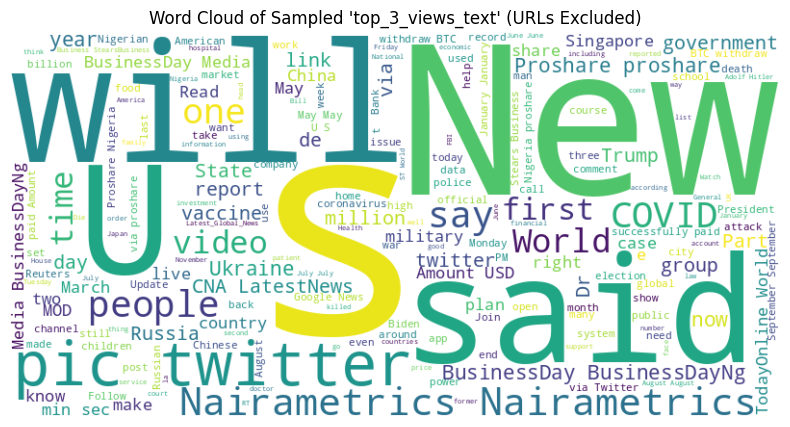

In [10]:
# Sample 2000 rows from the "top_3_views_text" column
sampled_text_data = df['top_3_views_text'].dropna().sample(n=2000, random_state=42)

# Function to remove URLs from text
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Remove URLs from the sampled text
sampled_text_data = sampled_text_data.apply(remove_urls)

# Concatenate all the text entries for the word cloud
all_text = " ".join(sampled_text_data)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Sampled 'top_3_views_text' (URLs Excluded)")
plt.show()

In [15]:
# Print 20 full text messages from the sampled data
print("\n---------\n".join(sampled_text_data.head(5)))

Fq: Jq for Binary Formats
Article, Comments
---------
TIME
TikTok COO Pappas Steps Down

TikTok Chief Executive Officer Shou Chew said that V. Pappas, the social media giant’s chief operating officer, is stepping down to focus on “entrepreneurial passions.”

Adam Presser, the company’s chief of staff, will become head of operations. Zenia Mucha, former head of communications at Walt Disney Co., is joining as chief brand and communications officer, a new position.

Pappas has been the longtime public face for TikTok in the U.S. as the company has tried to fend off a ban under two presidential administrations. The COO represented the company at a Senate hearing in September as the most recent wave of criticism ramped up. Pappas will continue as a strategic adviser.

TikTok, a division of China’s ByteDance Ltd., has risen to become one of the most popular social media apps in the world on the strength of user-generated, short-form videos. Given its Chinese ownership, the product has raise

## Language Detection

In [23]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from tqdm import tqdm

In [24]:
# Ensure reproducibility for langdetect
DetectorFactory.seed = 42

# Sample a subset of the text data
sampled_text_data = df['top_3_views_text'].dropna()#.sample(n=2000, random_state=42)

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Detect language for each text with tqdm progress bar
detected_languages = []
for text in tqdm(sampled_text_data, desc="Detecting Languages"):
    detected_languages.append(detect_language(text))

# Add detected languages to the DataFrame
sampled_text_data = pd.Series(detected_languages, index=sampled_text_data.index)

# Summarize the detected languages
language_counts = sampled_text_data.value_counts()

# Display the results
language_summary = language_counts.reset_index()
language_summary.columns = ['Language', 'Count']

Detecting Languages:  20%|██        | 867517/4249763 [1:06:40<4:08:36, 226.75it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Detecting Languages:  65%|██████▌   | 2776005/4249763 [3:44:51<1:36:29, 254.56it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Detecting Languages: 100%|██████████| 4249763/4249763 [5:47:14<00:00, 203.98it/s]  


In [25]:
language_summary

,Language,Count
0,en,3755647
1,unknown,325785
2,de,41464
3,es,20451
4,pt,10788
5,ro,10125
6,fr,9529
7,id,9272
8,ta,5665
9,it,4708


In [26]:
# Export
language_summary.to_csv("../02_data/language_summary.csv", index=False)